In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
267,15581282,Male,37,74000,0
164,15697574,Female,33,69000,0
3,15603246,Female,27,57000,0
60,15814004,Male,27,20000,0
260,15811177,Female,35,77000,0


In [5]:
df.drop('User ID',axis=1,inplace=True)

In [6]:
df.drop('Gender',axis=1,inplace=True)

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
116,35,75000,0
295,36,63000,0
106,26,35000,0
62,23,66000,0
291,49,89000,1


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1, inplace =False), df['Purchased'], test_size = 0.3, random_state=0)

In [11]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [15]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'Before Scaling')

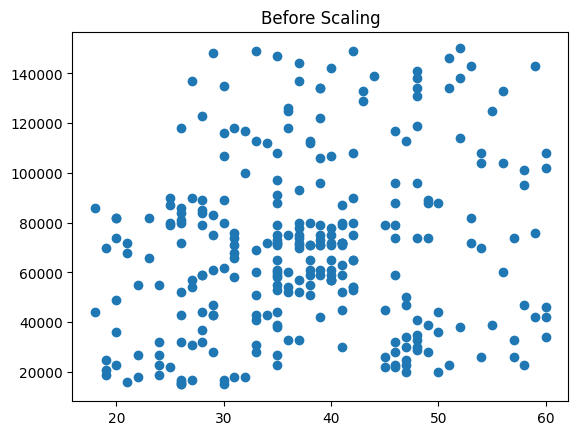

In [19]:
#Before Scaling vs After Scaling
plt.scatter('Age', 'EstimatedSalary', data = X_train)
plt.title('Before Scaling')

Text(0.5, 1.0, 'After Scaling')

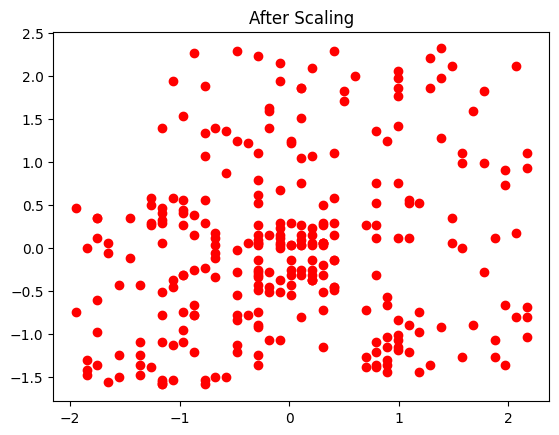

In [20]:
plt.scatter('Age', 'EstimatedSalary', data = X_train_scaled, color='red')
plt.title('After Scaling')

Text(0.5, 1.0, 'Before Scaling')

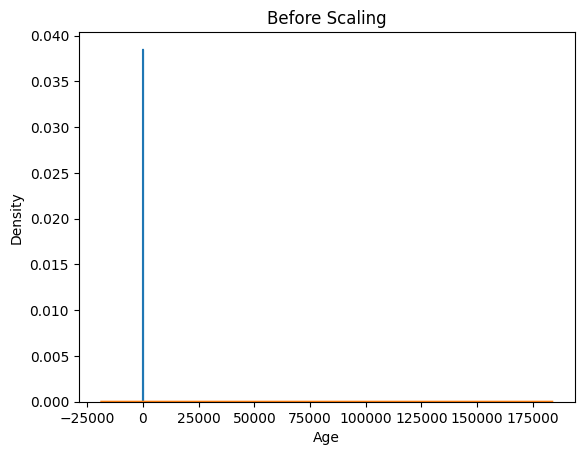

In [23]:
sns.kdeplot(X_train['Age'])
sns.kdeplot(X_train['EstimatedSalary'])
plt.title('Before Scaling')
#Probability Density Function

Text(0.5, 1.0, 'After Scaling')

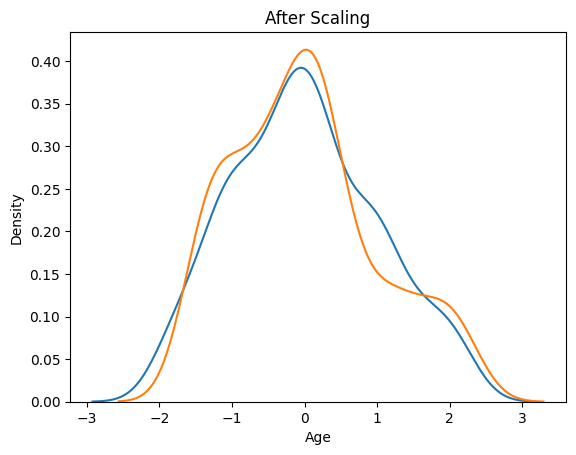

In [24]:
sns.kdeplot(X_train_scaled['Age'])
sns.kdeplot(X_train_scaled['EstimatedSalary'])
plt.title('After Scaling')

**Why scaling is important?**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.6583333333333333

In [33]:
accuracy_score(y_test, y_pred_scaled)

0.8666666666666667